<a href="https://colab.research.google.com/github/kriskalb/Laptop_store_regression/blob/main/project_regression_laptops_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive

# Mounting Google Drive and importing a csv file from the drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Kurs/laptop_price.csv'
df = pd.read_csv(path, encoding = 'ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import laptop_price.csv to df (Jupiter Notebook)
# df = pd.read_csv('laptop_price.csv', encoding = 'ISO-8859-1')
# df.info()

# Preliminary analysis

In [ ]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
len(list(df.laptop_ID.unique()))

1303

In [ ]:
df.laptop_ID.count()

1303

In [ ]:
df.set_index('laptop_ID', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 132.3+ KB


In [ ]:
# change type from object to category - chosen columns
for col in ['Company', 'Product', 'TypeName','ScreenResolution', 'Cpu','Ram', 'Memory', 'Gpu', 'OpSys']:
  df[col]=df[col].astype('category')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


In [ ]:
df.describe(include=['category']).T

,count,unique,top,freq
Company,1303,19,Dell,297
Product,1303,618,XPS 13,30
TypeName,1303,6,Notebook,727
ScreenResolution,1303,40,Full HD 1920x1080,507
Cpu,1303,118,Intel Core i5 7200U 2.5GHz,190
Ram,1303,9,8GB,619
Memory,1303,39,256GB SSD,412
Gpu,1303,110,Intel HD Graphics 620,281
OpSys,1303,9,Windows 10,1072


In [ ]:
df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

# Preliminary visualization

<Axes: >

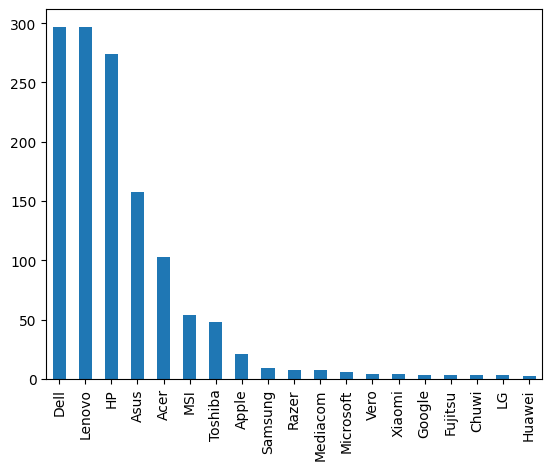

In [ ]:
df['Company'].value_counts().plot(kind='bar')

<Axes: >

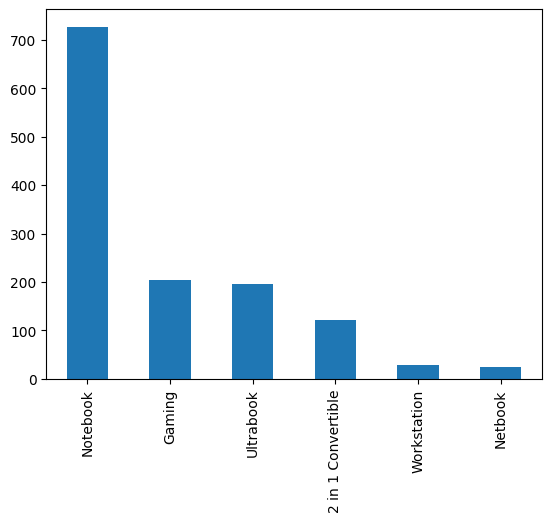

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')

<Axes: >

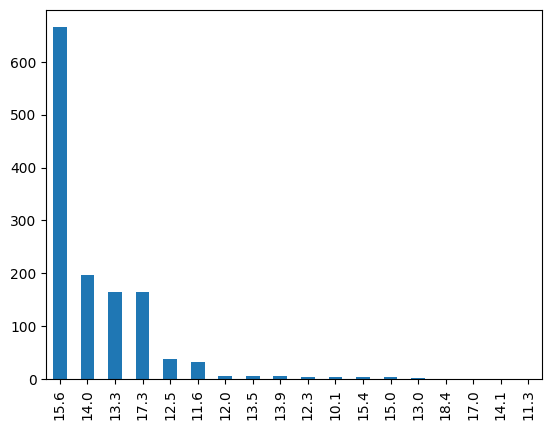

In [ ]:
df['Inches'].value_counts().plot(kind='bar')

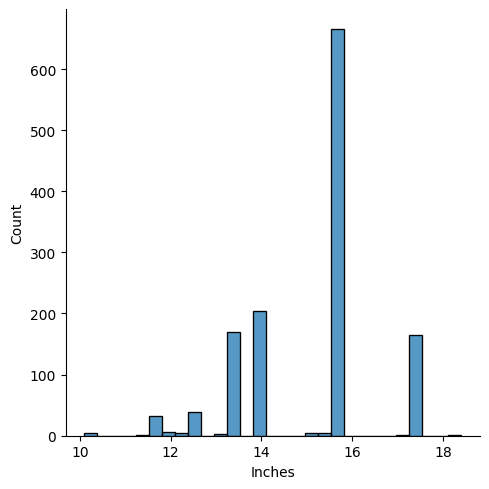

In [ ]:
sns.displot(df['Inches'])

<Axes: >

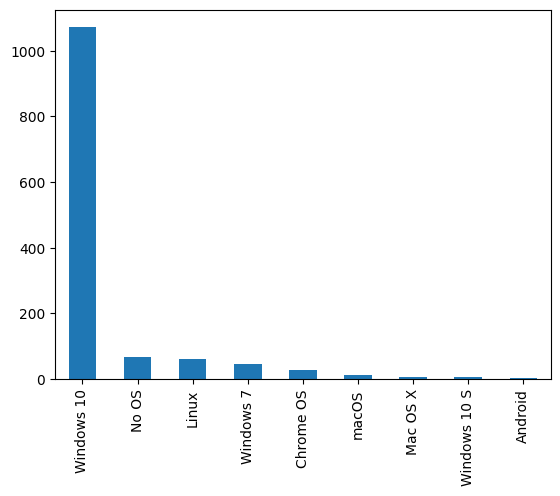

In [ ]:
df['OpSys'].value_counts().plot(kind='bar')

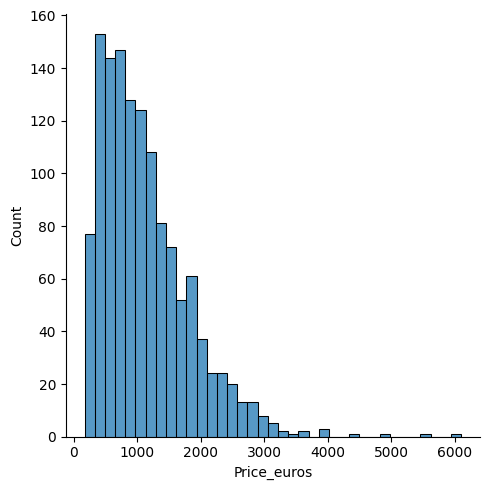

In [ ]:
sns.displot(df['Price_euros'])
plt.show()

In [ ]:
#sprawdzę wstępnie zależności

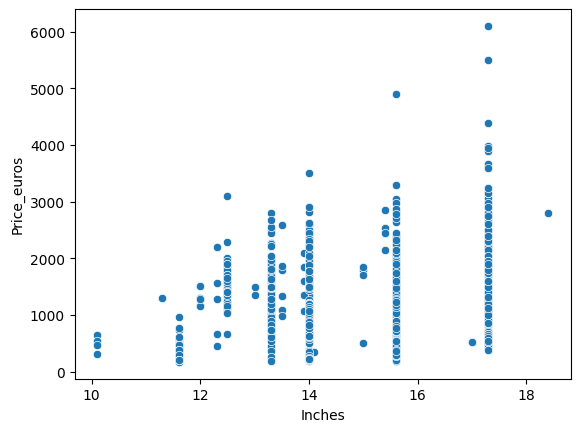

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])
plt.show()

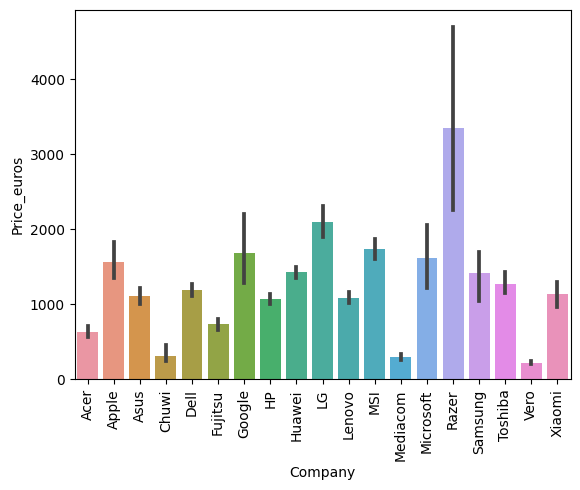

In [ ]:
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

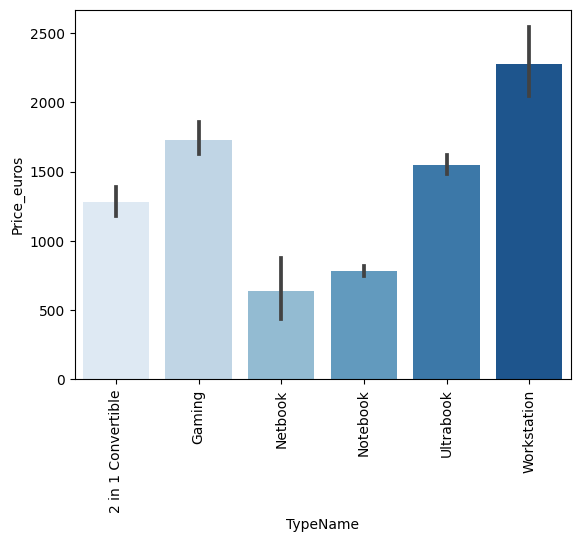

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price_euros'], palette='Blues')
plt.xticks(rotation='vertical')
plt.show()

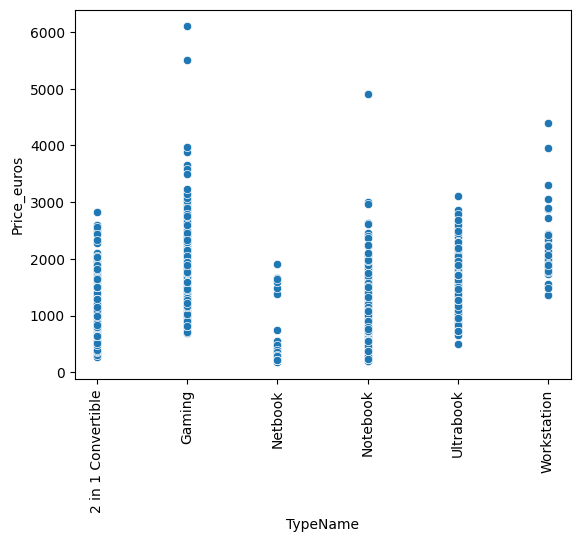

In [ ]:
sns.scatterplot(x=df['TypeName'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

# Przetwarzanie danych

## Przetwarzanie kolumny ScreenResolution

In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440               

In [ ]:
#rozdzielenie liczb od liter regex
wyrazenie_do_rozdzielenia = r'^(?P<nazwa>.*?)(?P<rozdzielczosc>\d+x\d+)?$'

# rozdzielenie do nowych kolumn
df[['NameResolution', 'Resolution']] = df['ScreenResolution'].str.extract(wyrazenie_do_rozdzielenia)

In [ ]:
df['Resolution'].unique()

array(['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768',
       '2304x1440', '3200x1800', '1920x1200', '2256x1504', '3840x2160',
       '2160x1440', '2560x1440', '1600x900', '2736x1824', '2400x1600'],
      dtype=object)

In [ ]:
df['Resolution'].value_counts()

1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: Resolution, dtype: int64

In [ ]:
#funkcja mapująca do podzialu na klasy rozdzielczosci , wyodrebnienie podzial
def podziel_na_klasy(rozdzielczosc):
    szerokosc, wysokosc = map(int, rozdzielczosc.split('x'))
    if szerokosc >= 3840 and wysokosc >= 2160:
        return '4K UHD'
    elif szerokosc >= 2560 and wysokosc >= 1440:
        return 'QHD'
    elif szerokosc >= 1920 and wysokosc >= 1080:
        return 'Full HD'
    else:
        return 'HD'

#przypisanie wynikow do nowej kolumny
df['Class_Resolution'] = df['Resolution'].apply(podziel_na_klasy)

In [ ]:
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,NameResolution,Resolution,Class_Resolution
laptop_ID,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560x1600,QHD
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,,1440x900,HD
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920x1080,Full HD
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880x1800,QHD
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560x1600,QHD


In [ ]:
# zmiana - zmienne kategoryczne klas rozdzielczosci  zakodowane funckją pd.get_dummies w rezultacie otrzymamy mapowanie zero-jedynkowe w nowych kolumnach
df = pd.get_dummies(data=df, drop_first=True, columns=['Class_Resolution'])



In [ ]:
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,NameResolution,Resolution,Class_Resolution_Full HD,Class_Resolution_HD,Class_Resolution_QHD
laptop_ID,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560x1600,0,0,1
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,,1440x900,0,1,0
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920x1080,1,0,0
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880x1800,0,0,1
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560x1600,0,0,1


In [ ]:
df.Memory.unique()

['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD', '500GB HDD', ..., '8GB SSD', '508GB Hybrid', '1.0TB HDD', '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid']
Length: 39
Categories (39, object): ['1.0TB HDD', '1.0TB Hybrid', '128GB Flash Storage', '128GB HDD', ...,
                          '64GB Flash Storage', '64GB Flash Storage +  1TB HDD', '64GB SSD', '8GB SSD']

## Czyszczenie kolumny 'Memory' oraz stworzenie na jej podstawie 'Memory_Size', 'Memory_Size_added', 'Memory_Type'

In [ ]:
df[['Memory_Size', 'Memory_Type']] = df['Memory'].str.split(' ', 1, expand=True)

<ipython-input-1449-03ea851b18e8>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Memory_Size', 'Memory_Type']] = df['Memory'].str.split(' ', 1, expand=True)


In [ ]:
df.Memory_Type.unique()

array(['SSD', 'Flash Storage', 'HDD', 'SSD +  1TB HDD',
       'SSD +  256GB SSD', 'SSD +  2TB HDD', 'Hybrid', 'SSD +  500GB HDD',
       'SSD +  512GB SSD', 'Flash Storage +  1TB HDD', 'HDD +  1TB HDD',
       'SSD +  1.0TB Hybrid'], dtype=object)

In [ ]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,NameResolution,Resolution,Class_Resolution_Full HD,Class_Resolution_HD,Class_Resolution_QHD,Memory_Size,Memory_Type
laptop_ID,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560x1600,0,0,1,128GB,SSD
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,,1440x900,0,1,0,128GB,Flash Storage
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920x1080,1,0,0,256GB,SSD
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880x1800,0,0,1,512GB,SSD
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560x1600,0,0,1,256GB,SSD


In [ ]:
df['Memory_Size_added'] = df['Memory_Type'].copy()

In [ ]:
df.loc[~(df['Memory_Type'].str.contains('\+')), 'Memory_Size_added'] = '0'

In [ ]:
df.loc[(df['Memory_Type'].str.contains('\+')), 'Memory_Size_added'] = df.loc[(df['Memory_Type'].str.contains('\+')), 'Memory_Size_added'].str.split().apply(lambda x: x[-2])

In [ ]:
df.Memory_Size_added.unique()

array(['0', '1TB', '256GB', '2TB', '500GB', '512GB', '1.0TB'],
      dtype=object)

In [ ]:
df.loc[df['Memory_Size_added']=='1TB', 'Memory_Size_added'] = '1000GB'
df.loc[df['Memory_Size_added']=='2TB', 'Memory_Size_added'] = '2000GB'
df.loc[df['Memory_Size_added']=='1.0TB', 'Memory_Size_added'] = '1000GB'

In [ ]:
df['Memory_Size_added'] = df['Memory_Size_added'].str.replace('[a-zA-Z]', '', regex=True).astype(float)

In [ ]:
df.Memory_Size_added.unique()

array([   0., 1000.,  256., 2000.,  500.,  512.])

In [ ]:
df.Memory_Size.unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '32GB', '64GB', '2TB',
       '1.0TB', '16GB', '180GB', '240GB', '8GB', '508GB'], dtype=object)

In [ ]:
df.loc[df['Memory_Size']=='1TB', 'Memory_Size'] = '1000GB'
df.loc[df['Memory_Size']=='2TB', 'Memory_Size'] = '2000GB'
df.loc[df['Memory_Size']=='1.0TB', 'Memory_Size'] = '1000GB'

In [ ]:
df['Memory_Size'] = df['Memory_Size'].str.replace('[a-zA-Z]', '', regex=True).astype(float)

In [ ]:
df.Memory_Size.unique()

array([ 128.,  256.,  512.,  500., 1000.,   32.,   64., 2000.,   16.,
        180.,  240.,    8.,  508.])

In [ ]:
df['Memory_Type'].unique()

array(['SSD', 'Flash Storage', 'HDD', 'SSD +  1TB HDD',
       'SSD +  256GB SSD', 'SSD +  2TB HDD', 'Hybrid', 'SSD +  500GB HDD',
       'SSD +  512GB SSD', 'Flash Storage +  1TB HDD', 'HDD +  1TB HDD',
       'SSD +  1.0TB Hybrid'], dtype=object)

In [ ]:
df.loc[df['Memory_Type'].str.startswith('SSD') & df['Memory_Type'].str.endswith('SSD'), 'Memory_Type'] = 'SSD'

In [ ]:
df.loc[df['Memory_Type'].str.startswith('SSD') & df['Memory_Type'].str.endswith('HDD'), 'Memory_Type'] = 'SSD + HDD'

In [ ]:
df.loc[df['Memory_Type'].str.startswith('Flash Storage') & df['Memory_Type'].str.endswith('HDD'), 'Memory_Type'] = 'SSD + HDD'


In [ ]:
df.loc[df['Memory_Type'].str.startswith('HDD') & df['Memory_Type'].str.endswith('HDD'), 'Memory_Type'] = 'HDD'


In [ ]:
df.loc[df['Memory_Type'].str.startswith('SSD') & df['Memory_Type'].str.endswith('Hybrid'), 'Memory_Type'] = 'SSD + HDD'


In [ ]:
df.loc[df['Memory_Type']=='Flash Storage', 'Memory_Type'] = 'SSD'


In [ ]:
df.loc[df['Memory_Type']=='Hybrid', 'Memory_Type'] = 'HDD'

In [ ]:
df['Memory_Type'].unique()

array(['SSD', 'HDD', 'SSD + HDD'], dtype=object)

In [ ]:
df['Memory_Type_num'] = df['Memory_Type'].copy()

In [ ]:
memory_types = {
    'HDD': 1,
    'SSD + HDD': 2,
    'SSD': 3,
}

# Zamiana wartości w kolumnie na numeryczne z użyciem mapowania
df['Memory_Type_num'] = df['Memory_Type_num'].map(memory_types)

In [ ]:
df['Memory_Type_num'].unique()

array([3, 1, 2])

## Czyszczenie kolumny 'GPU' oraz stworzenie na jej podstawie 'GPU_producent'

In [ ]:
len(list(df.Gpu.unique()))

110

In [ ]:
len(list(df.Cpu.unique()))

118

In [ ]:
df.Gpu.unique()

['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000', 'Intel HD Graphics 620', 'AMD Radeon Pro 455', 'Intel Iris Plus Graphics 650', ..., 'Nvidia Quadro M500M', 'AMD Radeon R7 M360', 'Nvidia Quadro M3000M', 'Nvidia GeForce 960M', 'ARM Mali T860 MP4']
Length: 110
Categories (110, object): ['AMD FirePro W4190M', 'AMD FirePro W4190M ', 'AMD FirePro W5130M',
                           'AMD FirePro W6150M', ..., 'Nvidia Quadro M500M', 'Nvidia Quadro M520M',
                           'Nvidia Quadro M620', 'Nvidia Quadro M620M']

In [ ]:
df['Gpu_producent']=df['Gpu'].astype(object).copy()

In [ ]:
df.loc[df['Gpu_producent'].str.startswith('Intel'), 'Gpu_producent'] = 'Intel'

In [ ]:
df.loc[df['Gpu_producent'].str.startswith('AMD'), 'Gpu_producent'] = 'AMD'

In [ ]:
df.loc[df['Gpu_producent'].str.startswith('Nvidia'), 'Gpu_producent'] = 'Nvidia'

In [ ]:
df.loc[df['Gpu_producent'].str.startswith('ARM'), 'Gpu_producent'] = 'ARM'

In [ ]:
df.Gpu_producent.unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Wykorzystanie LabelEncoder do zakodowania kolumny 'Gpu_producent'
df['GPU_encoded'] = label_encoder.fit_transform(df['Gpu_producent'])
df.GPU_encoded.unique()

array([2, 0, 3, 1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Company                   1303 non-null   category
 1   Product                   1303 non-null   category
 2   TypeName                  1303 non-null   category
 3   Inches                    1303 non-null   float64 
 4   ScreenResolution          1303 non-null   category
 5   Cpu                       1303 non-null   category
 6   Ram                       1303 non-null   category
 7   Memory                    1303 non-null   category
 8   Gpu                       1303 non-null   category
 9   OpSys                     1303 non-null   category
 10  Weight                    1303 non-null   object  
 11  Price_euros               1303 non-null   float64 
 12  NameResolution            1303 non-null   object  
 13  Resolution                1303 non-null   object

## Czyszczenie kolumny 'Weight' i zmiana typu kolumny na float

In [ ]:
df.Weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [ ]:
df['Weight'].str.endswith('kg').count()

1303

In [ ]:
df['Weight'] = df['Weight'].str.replace('kg','')


In [ ]:
df['Weight'] = df['Weight'].astype(float)

In [ ]:
df.Weight.unique()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

## Czyszczenie kolumny 'Opsys' i stworzenie na jej podstawie uproszczonej kolumny OpSys_num z wartościami numerycznymi

In [ ]:
df.OpSys.unique()

['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android', 'Windows 10 S', 'Chrome OS', 'Windows 7']
Categories (9, object): ['Android', 'Chrome OS', 'Linux', 'Mac OS X', ..., 'Windows 10',
                         'Windows 10 S', 'Windows 7', 'macOS']

In [ ]:
df['OpSys_num'] = df['OpSys'].copy()

In [ ]:
df.loc[df['OpSys_num']=='Chrome OS', 'OpSys_num'] = 'Android'

In [ ]:
df.loc[df['OpSys_num']=='Windows 10 S', 'OpSys_num'] = 'Windows 10'

In [ ]:
df.loc[df['OpSys_num']=='Mac OS X', 'OpSys_num'] = 'macOS'

In [ ]:
df.OpSys_num.unique()

['macOS', 'No OS', 'Windows 10', 'Linux', 'Android', 'Windows 7']
Categories (9, object): ['Android', 'Chrome OS', 'Linux', 'Mac OS X', ..., 'Windows 10',
                         'Windows 10 S', 'Windows 7', 'macOS']

In [ ]:
systems = {
    'No OS': 0,
    'Linux': 1,
    'Android': 2,
    'Windows 7': 3,
    'Windows 10': 4,
    'macOS': 5,
}

# Zamiana wartości w kolumnie na numeryczne z użyciem mapowania
df['OpSys_num'] = df['OpSys_num'].map(systems)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Company                   1303 non-null   category
 1   Product                   1303 non-null   category
 2   TypeName                  1303 non-null   category
 3   Inches                    1303 non-null   float64 
 4   ScreenResolution          1303 non-null   category
 5   Cpu                       1303 non-null   category
 6   Ram                       1303 non-null   category
 7   Memory                    1303 non-null   category
 8   Gpu                       1303 non-null   category
 9   OpSys                     1303 non-null   category
 10  Weight                    1303 non-null   float64 
 11  Price_euros               1303 non-null   float64 
 12  NameResolution            1303 non-null   object  
 13  Resolution                1303 non-null   object

In [ ]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Class_Resolution_Full HD,Class_Resolution_HD,Class_Resolution_QHD,Memory_Size,Memory_Type,Memory_Size_added,Memory_Type_num,Gpu_producent,GPU_encoded,OpSys_num
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,0,0,1,128.0,SSD,0.0,3,Intel,2,5.0
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,0,1,0,128.0,SSD,0.0,3,Intel,2,5.0
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,...,1,0,0,256.0,SSD,0.0,3,Intel,2,0.0
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,...,0,0,1,512.0,SSD,0.0,3,AMD,0,5.0
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,0,0,1,256.0,SSD,0.0,3,Intel,2,5.0


In [ ]:
df.Product.unique()

['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3', 'ZenBook UX430UN', ..., 'Stream 11-Y000na', 'X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce', 'Yoga 500-14ISK', '15-AC110nv (i7-6500U/6GB/1TB/Radeon', 'X553SA-XX031T (N3050/4GB/500GB/W10)']
Length: 618
Categories (618, object): ['110-15ACL (A6-7310/4GB/500GB/W10)', '14-am079na (N3710/8GB/2TB/W10)',
                           '15-AC110nv (i7-6500U/6GB/1TB/Radeon', '15-AY023na (N3710/8GB/2TB/W10)', ...,
                           'Zenbook UX390UA', 'Zenbook UX410UA-GV027T', 'Zenbook UX430UA',
                           'Zenbook UX510UW-FI095T']

## Czyszczenie kolumny 'Cpu' i stworzenie na jej podstawie uproszczonej kolumny Cpu_producent oraz CPU_encoded z wartościami numerycznymi, Cpu_GHZ, Cpu_series_encoded (z wartościami numerycznymi odpowiadającymi seriom procesorów)

In [ ]:
df.Cpu.unique()

['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz', 'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz', 'Intel Core i5 3.1GHz', ..., 'Intel Celeron Dual Core N3350 2GHz', 'Samsung Cortex A72&A53 2.0GHz', 'AMD E-Series 9000 2.2GHz', 'Intel Core M 6Y30 0.9GHz', 'AMD A9-Series 9410 2.9GHz']
Length: 118
Categories (118, object): ['AMD A10-Series 9600P 2.4GHz', 'AMD A10-Series 9620P 2.5GHz',
                           'AMD A10-Series A10-9620P 2.5GHz', 'AMD A12-Series 9700P 2.5GHz', ...,
                           'Intel Xeon E3-1505M V6 3GHz', 'Intel Xeon E3-1535M v5 2.9GHz',
                           'Intel Xeon E3-1535M v6 3.1GHz', 'Samsung Cortex A72&A53 2.0GHz']

In [ ]:
df['Cpu_producent'] = df['Cpu'].str.split().str[0]

In [ ]:
df.Cpu_producent.unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [ ]:
label_encoder_cpu = LabelEncoder()

# Wykorzystanie LabelEncoder do zakodowania kolumny 'Gpu_producent'
df['CPU_encoded'] = label_encoder_cpu.fit_transform(df['Cpu_producent'])
df.CPU_encoded.unique()

array([1, 0, 2])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Company                   1303 non-null   category
 1   Product                   1303 non-null   category
 2   TypeName                  1303 non-null   category
 3   Inches                    1303 non-null   float64 
 4   ScreenResolution          1303 non-null   category
 5   Cpu                       1303 non-null   category
 6   Ram                       1303 non-null   category
 7   Memory                    1303 non-null   category
 8   Gpu                       1303 non-null   category
 9   OpSys                     1303 non-null   category
 10  Weight                    1303 non-null   float64 
 11  Price_euros               1303 non-null   float64 
 12  NameResolution            1303 non-null   object  
 13  Resolution                1303 non-null   object

In [ ]:
df.TypeName.unique()

['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible', 'Workstation']
Categories (6, object): ['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation']

In [ ]:
df['Cpu_GHZ'] = df['Cpu'].str.split().str[-1]
df['Cpu_GHZ'].unique()

array(['2.3GHz', '1.8GHz', '2.5GHz', '2.7GHz', '3.1GHz', '3GHz', '2.2GHz',
       '1.6GHz', '2GHz', '2.8GHz', '1.2GHz', '2.9GHz', '2.4GHz',
       '1.44GHz', '1.5GHz', '1.9GHz', '1.1GHz', '2.0GHz', '1.3GHz',
       '2.6GHz', '3.6GHz', '1.60GHz', '3.2GHz', '1.0GHz', '2.1GHz',
       '0.9GHz', '1.92GHz', '2.50GHz', '2.70GHz'], dtype=object)

In [ ]:
df['Cpu_GHZ'] = df['Cpu_GHZ'].str.replace('[a-zA-Z]', '', regex=True).astype(float)

In [ ]:
df['Cpu_GHZ'].unique()

array([2.3 , 1.8 , 2.5 , 2.7 , 3.1 , 3.  , 2.2 , 1.6 , 2.  , 2.8 , 1.2 ,
       2.9 , 2.4 , 1.44, 1.5 , 1.9 , 1.1 , 1.3 , 2.6 , 3.6 , 3.2 , 1.  ,
       2.1 , 0.9 , 1.92])

In [ ]:
df['Ram'].unique()

['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB']
Categories (9, object): ['12GB', '16GB', '24GB', '2GB', ..., '4GB', '64GB', '6GB', '8GB']

In [ ]:
df['Ram'] = df['Ram'].str.replace('[a-zA-Z]', '', regex=True).astype(int)
df['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Company                   1303 non-null   category
 1   Product                   1303 non-null   category
 2   TypeName                  1303 non-null   category
 3   Inches                    1303 non-null   float64 
 4   ScreenResolution          1303 non-null   category
 5   Cpu                       1303 non-null   category
 6   Ram                       1303 non-null   int64   
 7   Memory                    1303 non-null   category
 8   Gpu                       1303 non-null   category
 9   OpSys                     1303 non-null   category
 10  Weight                    1303 non-null   float64 
 11  Price_euros               1303 non-null   float64 
 12  NameResolution            1303 non-null   object  
 13  Resolution                1303 non-null   object

In [ ]:
def wydobadz_srodek(tekst):
    slowa = tekst.split()
    return ' '.join(slowa[1:-1])

# Stworzenie nowej kolumny 'srodek_slowa' z wydobytymi słowami
df['Cpu_model'] = df['Cpu'].apply(wydobadz_srodek)
df['Cpu_model'].unique()

array(['Core i5', 'Core i5 7200U', 'Core i7', 'A9-Series 9420',
       'Core i7 8550U', 'Core i5 8250U', 'Core i3 6006U', 'Core M m3',
       'Core i7 7500U', 'Core i3 7100U', 'Atom x5-Z8350',
       'Core i5 7300HQ', 'E-Series E2-9000e', 'Core i7 8650U',
       'Atom x5-Z8300', 'E-Series E2-6110', 'A6-Series 9220',
       'Celeron Dual Core N3350', 'Core i3 7130U', 'Core i7 7700HQ',
       'Ryzen 1700', 'Pentium Quad Core N4200', 'Atom x5-Z8550',
       'Celeron Dual Core N3060', 'FX 9830P', 'Core i7 7560U',
       'E-Series 6110', 'Core i5 6200U', 'Core M 6Y75', 'Core i5 7500U',
       'Core i7 6920HQ', 'Core i5 7Y54', 'Core i7 7820HK',
       'Xeon E3-1505M V6', 'Core i7 6500U', 'E-Series 9000e',
       'A10-Series A10-9620P', 'A6-Series A6-9220', 'Core i7 6600U',
       'Celeron Dual Core 3205U', 'Core i7 7820HQ', 'A10-Series 9600P',
       'Core i7 7600U', 'A8-Series 7410', 'Celeron Dual Core 3855U',
       'Pentium Quad Core N3710', 'A12-Series 9720P', 'Core i5 7300U',
       'Ce

In [ ]:
len(list(df['Cpu_model'].unique()))


93

In [ ]:
def wydobadz_serie(tekst):
    slowa = tekst.split()
    return ' '.join(slowa[0:-1])

df['Cpu_series'] = df['Cpu_model'].apply(wydobadz_serie)
df['Cpu_series'].unique()

array(['Core', 'Core i5', 'A9-Series', 'Core i7', 'Core i3', 'Core M',
       'Atom', 'E-Series', 'A6-Series', 'Celeron Dual Core', 'Ryzen',
       'Pentium Quad Core', 'FX', 'Xeon E3-1505M', 'A10-Series',
       'A8-Series', 'A12-Series', 'Celeron Quad Core', 'Xeon E3-1535M',
       'Pentium Dual Core', 'A4-Series', 'Cortex'], dtype=object)

In [ ]:
df.loc[df['Cpu_series']=='Xeon E3-1535M', 'Cpu_series'] = 'Xeon E3'

In [ ]:
df.loc[df['Cpu_series']=='Xeon E3-1505M', 'Cpu_series'] = 'Xeon E3'

In [ ]:
df['Cpu_series'].unique()

array(['Core', 'Core i5', 'A9-Series', 'Core i7', 'Core i3', 'Core M',
       'Atom', 'E-Series', 'A6-Series', 'Celeron Dual Core', 'Ryzen',
       'Pentium Quad Core', 'FX', 'Xeon E3', 'A10-Series', 'A8-Series',
       'A12-Series', 'Celeron Quad Core', 'Pentium Dual Core',
       'A4-Series', 'Cortex'], dtype=object)

In [ ]:
label_encoder_series = LabelEncoder()

# Wykorzystanie LabelEncoder do zakodowania kolumny 'Cpu_series'
df['Cpu_series_encoded'] = label_encoder_series.fit_transform(df['Cpu_series'])
df.Cpu_series_encoded.unique()

array([ 9, 12,  5, 13, 11, 10,  6, 15,  3,  7, 19, 18, 16, 20,  0,  4,  1,
        8, 17,  2, 14])

## Czyszczenie kolumny Company oraz stworzenie Company_encoded z wartościami numerycznymi

In [ ]:
df['Company'].unique()

['Apple', 'HP', 'Acer', 'Asus', 'Dell', ..., 'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG']
Length: 19
Categories (19, object): ['Acer', 'Apple', 'Asus', 'Chuwi', ..., 'Samsung', 'Toshiba', 'Vero',
                          'Xiaomi']

In [ ]:
label_encoder_company = LabelEncoder()

# Wykorzystanie LabelEncoder do zakodowania kolumny 'Cpu_series'
df['Company_encoded'] = label_encoder_company.fit_transform(df['Company'])
df.Company_encoded.unique()

array([ 1,  7,  0,  2,  4, 10,  3, 11, 13, 16,  8, 18, 17, 14, 12, 15,  6,
        5,  9])

## Czyszczenie kolumny TypeName oraz stworzenie TypeName_encoded z wartościami numerycznymi


In [ ]:
df['TypeName'].unique()

['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible', 'Workstation']
Categories (6, object): ['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation']

In [ ]:
label_encoder_typename = LabelEncoder()

# Wykorzystanie LabelEncoder do zakodowania kolumny 'Cpu_series'
df['TypeName_encoded'] = label_encoder_typename.fit_transform(df['TypeName'])
df.TypeName_encoded.unique()

array([4, 3, 2, 1, 0, 5])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Company                   1303 non-null   category
 1   Product                   1303 non-null   category
 2   TypeName                  1303 non-null   category
 3   Inches                    1303 non-null   float64 
 4   ScreenResolution          1303 non-null   category
 5   Cpu                       1303 non-null   category
 6   Ram                       1303 non-null   int64   
 7   Memory                    1303 non-null   category
 8   Gpu                       1303 non-null   category
 9   OpSys                     1303 non-null   category
 10  Weight                    1303 non-null   float64 
 11  Price_euros               1303 non-null   float64 
 12  NameResolution            1303 non-null   object  
 13  Resolution                1303 non-null   object

# Wizualizacja kolumn numerycznych względem zmiennej Price_euros

## Rozkład zmiennych

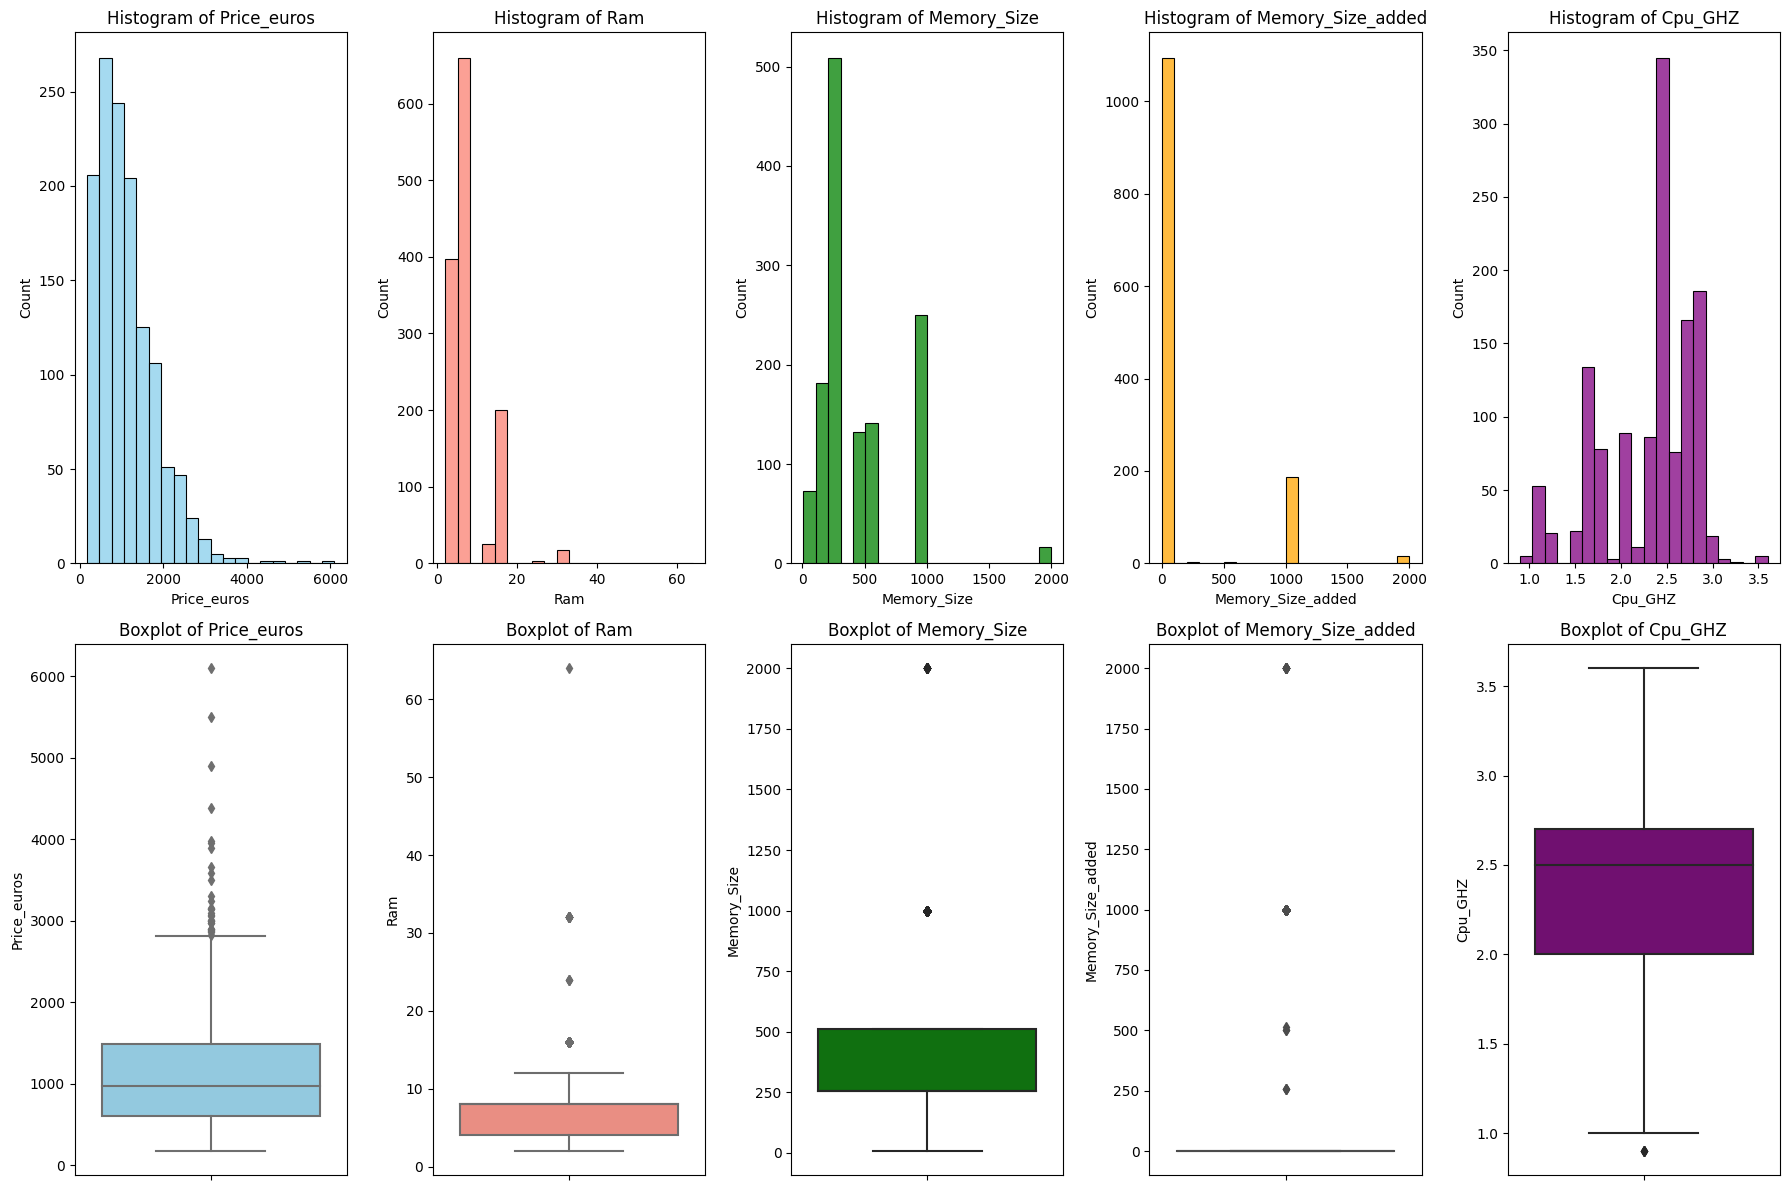

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Price_euros', 'Ram', 'Memory_Size','Memory_Size_added', 'Cpu_GHZ']

# Dodaj kolejne kolory do listy 'palette' w przypadku, gdy liczba kolumn jest większa niż liczba kolorów w liście
palette = ["skyblue", "salmon", "green", "orange", "purple"]

fig, axs = plt.subplots(2, len(numerical_cols), figsize=(18, 12))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=False, color=palette[i], ax=axs[0, i], bins=20)
    axs[0, i].set_title(f'Histogram of {col}')

    sns.boxplot(y=col, data=df, color=palette[i], ax=axs[1, i])
    axs[1, i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

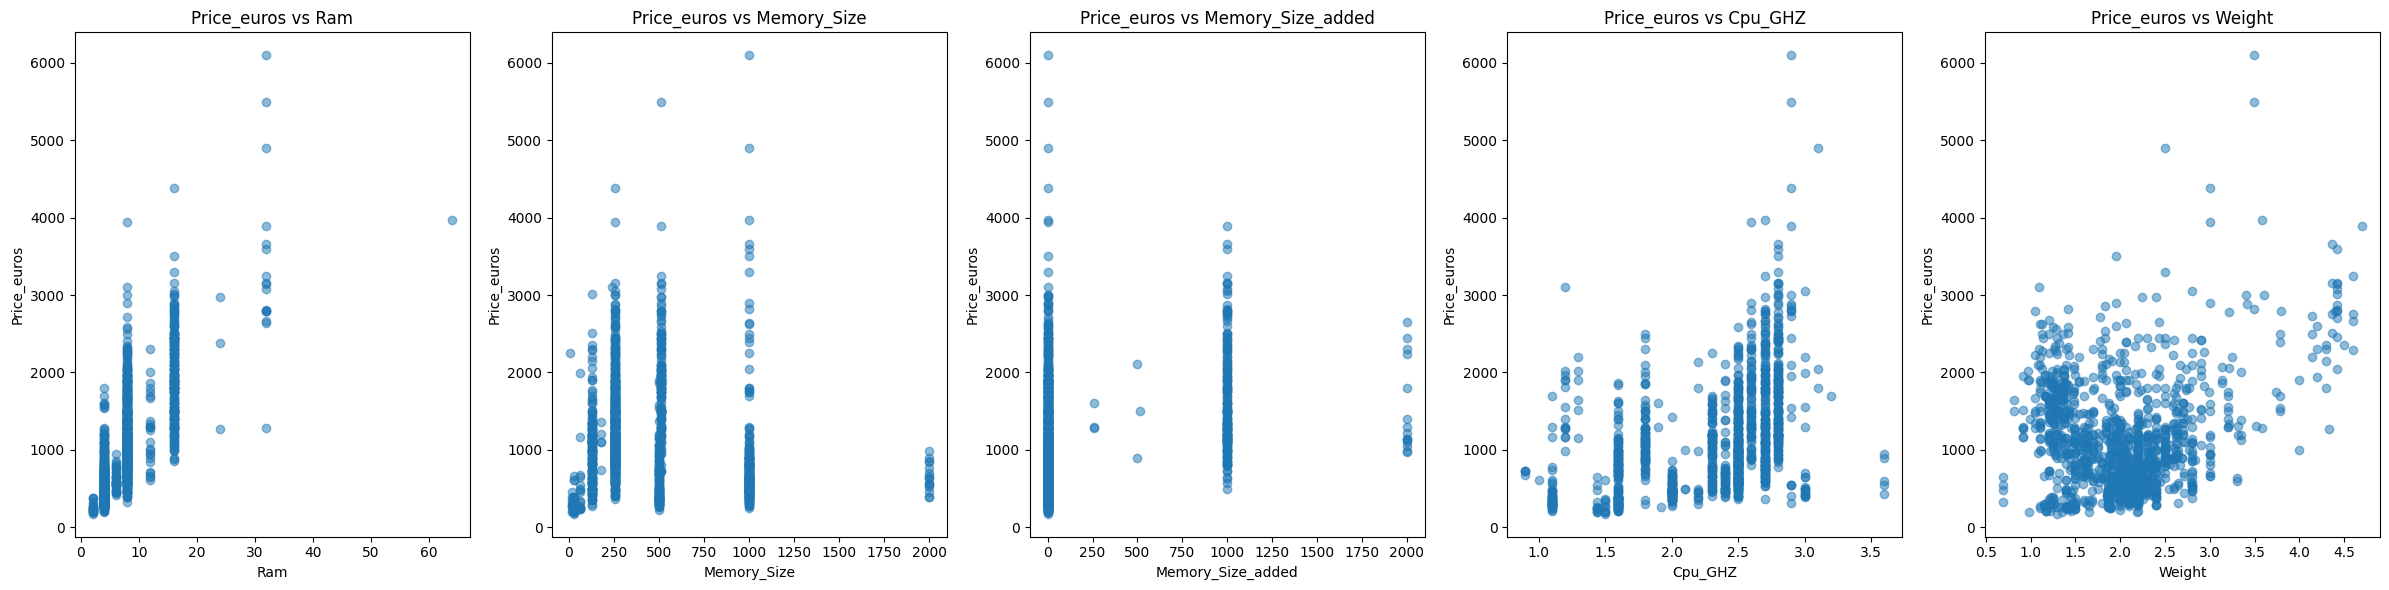

In [ ]:
numerical_cols = ['Ram', 'Memory_Size', 'Memory_Size_added', 'Cpu_GHZ', 'Weight']

fig, axs = plt.subplots(1, len(numerical_cols), figsize=(24, 6))

for i, col in enumerate(numerical_cols):
    axs[i].scatter(df[col], df['Price_euros'], alpha=0.5)
    axs[i].set_title(f'Price_euros vs {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Price_euros')

plt.tight_layout()
plt.show()

## Zmienne kategoryczne

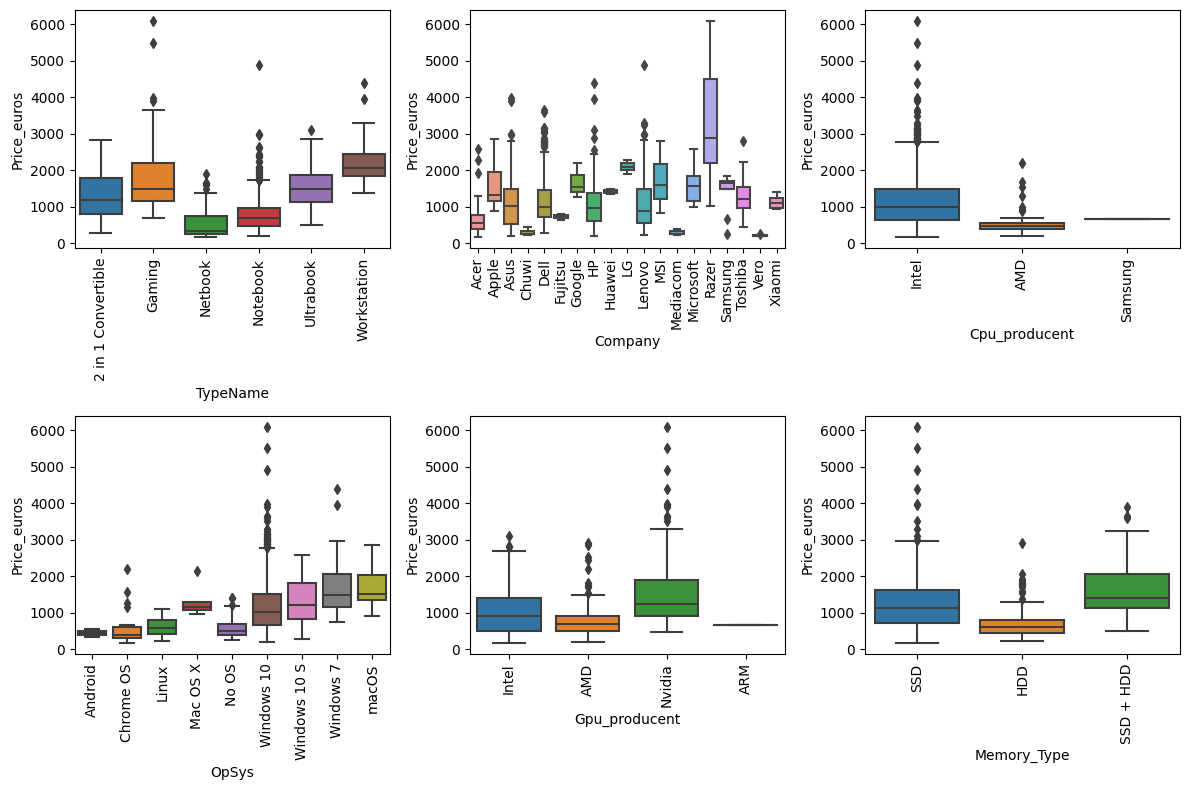

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# TypeName
plt.subplot(2, 3, 1)
sns.boxplot(x='TypeName', y='Price_euros', data=df)
plt.xticks(rotation=90)  # Ustawienie nazw kategorii pionowo

# Company
plt.subplot(2, 3, 2)
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.xticks(rotation=90)  # Ustawienie nazw kategorii pionowo

# CPU_producent
plt.subplot(2, 3, 3)
sns.boxplot(x='Cpu_producent', y='Price_euros', data=df)
plt.xticks(rotation=90)  # Ustawienie nazw kategorii pionowo

# OpSys
plt.subplot(2, 3, 4)
sns.boxplot(x='OpSys', y='Price_euros', data=df)
plt.xticks(rotation=90)  # Ustawienie nazw kategorii pionowo

# GPU_producent
plt.subplot(2, 3, 5)
sns.boxplot(x='Gpu_producent', y='Price_euros', data=df)
plt.xticks(rotation=90)  # Ustawienie nazw kategorii pionowo

# Memory_Type
plt.subplot(2, 3, 6)
sns.boxplot(x='Memory_Type', y='Price_euros', data=df)
plt.xticks(rotation=90)  # Ustawienie nazw kategorii pionowo

plt.tight_layout()
plt.show()

## Macierz korelacji

<ipython-input-1528-f999c06e4b24>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


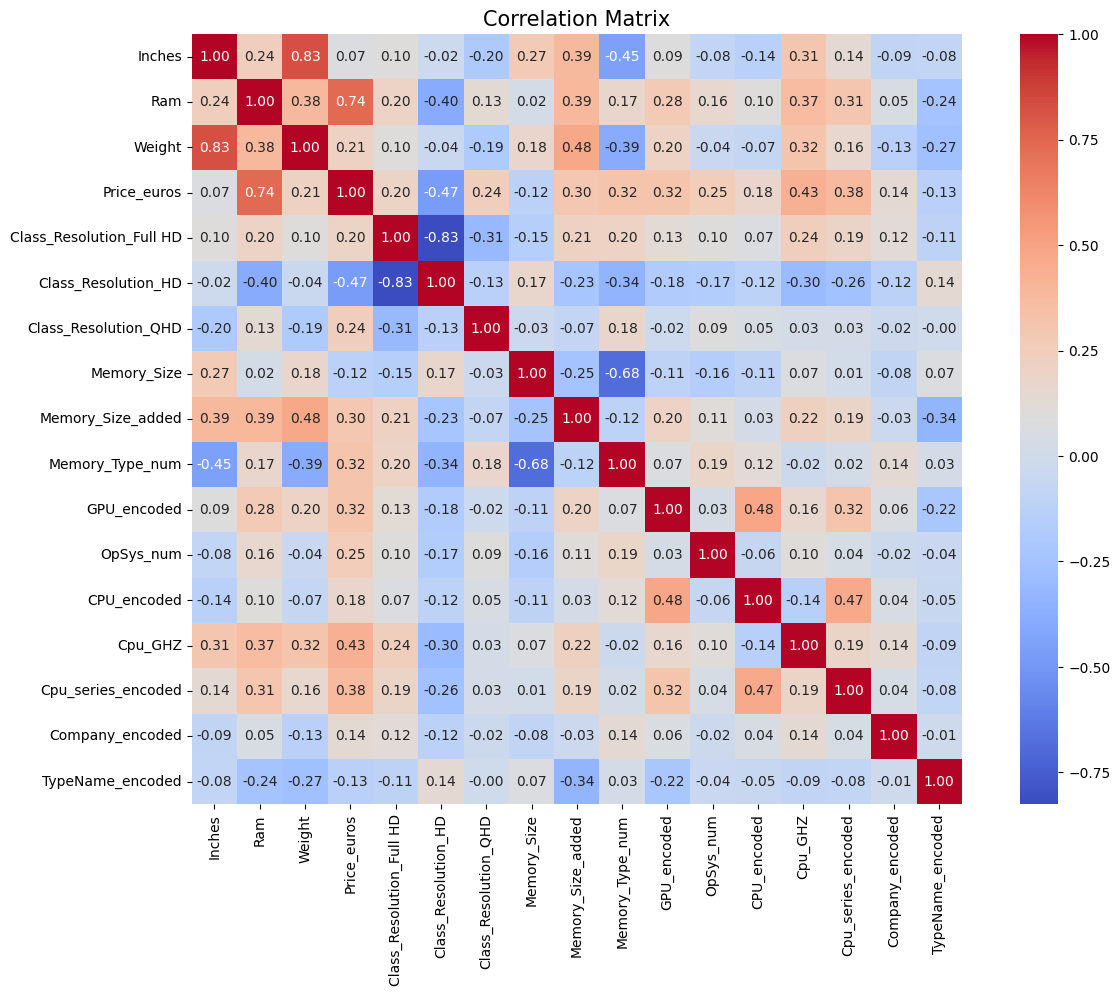

,Inches,Ram,Weight,Price_euros,Class_Resolution_Full HD,Class_Resolution_HD,Class_Resolution_QHD,Memory_Size,Memory_Size_added,Memory_Type_num,GPU_encoded,OpSys_num,CPU_encoded,Cpu_GHZ,Cpu_series_encoded,Company_encoded,TypeName_encoded
Inches,1.000000,0.237993,0.827631,0.068197,0.100272,-0.019164,-0.197607,0.269511,0.386670,-0.450374,0.089552,-0.079198,-0.135423,0.307870,0.139880,-0.085784,-0.077428
Ram,0.237993,1.000000,0.383874,0.743007,0.204385,-0.395952,0.130582,0.018271,0.391826,0.166836,0.276741,0.159578,0.100722,0.368000,0.305054,0.046508,-0.242862
Weight,0.827631,0.383874,1.000000,0.210370,0.098109,-0.037210,-0.189528,0.179962,0.479133,-0.391683,0.203037,-0.043301,-0.066840,0.320434,0.162976,-0.129610,-0.267002
Price_euros,0.068197,0.743007,0.210370,1.000000,0.200634,-0.473723,0.240263,-0.122365,0.295004,0.317095,0.322535,0.252568,0.176089,0.430293,0.378998,0.140371,-0.127313
Class_Resolution_Full HD,0.100272,0.204385,0.098109,0.200634,1.000000,-0.825295,-0.310906,-0.153922,0.209302,0.204399,0.126352,0.095529,0.071406,0.243106,0.192987,0.119873,-0.111246
Class_Resolution_HD,-0.019164,-0.395952,-0.037210,-0.473723,-0.825295,1.000000,-0.130373,0.169150,-0.232897,-0.343657,-0.180004,-0.172652,-0.117022,-0.303956,-0.260823,-0.122738,0.139472
Class_Resolution_QHD,-0.197607,0.130582,-0.189528,0.240263,-0.310906,-0.130373,1.000000,-0.028645,-0.074614,0.179146,-0.018912,0.092103,0.048291,0.027814,0.026108,-0.022258,-0.001555
Memory_Size,0.269511,0.018271,0.179962,-0.122365,-0.153922,0.169150,-0.028645,1.000000,-0.245546,-0.683889,-0.110630,-0.159764,-0.107423,0.066295,0.010906,-0.083812,0.071694
Memory_Size_added,0.386670,0.391826,0.479133,0.295004,0.209302,-0.232897,-0.074614,-0.245546,1.000000,-0.119299,0.201978,0.106591,0.028985,0.224018,0.192142,-0.030687,-0.340074
Memory_Type_num,-0.450374,0.166836,-0.391683,0.317095,0.204399,-0.343657,0.179146,-0.683889,-0.119299,1.000000,0.072288,0.186091,0.119107,-0.020661,0.020892,0.139384,0.029162


In [ ]:
corr_df = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title("Correlation Matrix", fontsize=15)
plt.show()

corr_df

## Rozkład zmiennej Price_euros

In [ ]:
y = df['Price_euros']
y.head()

laptop_ID
1    1339.69
2     898.94
3     575.00
4    2537.45
5    1803.60
Name: Price_euros, dtype: float64

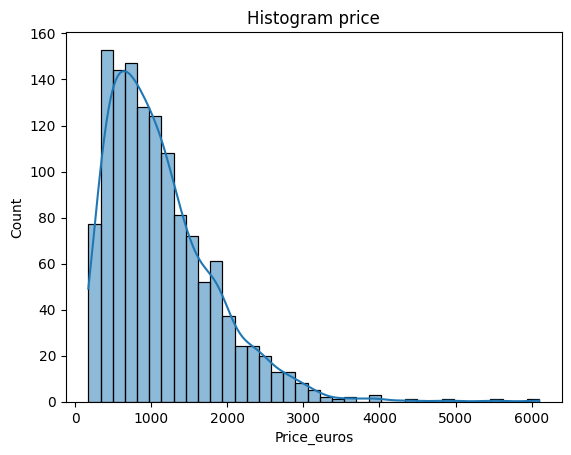

In [ ]:
sns.histplot(y, kde=True)
plt.title('Histogram price')
plt.show()

In [ ]:
y_log = np.log1p(df['Price_euros'])
y_log.head()

laptop_ID
1    7.200940
2    6.802328
3    6.356108
4    7.839309
5    7.498094
Name: Price_euros, dtype: float64

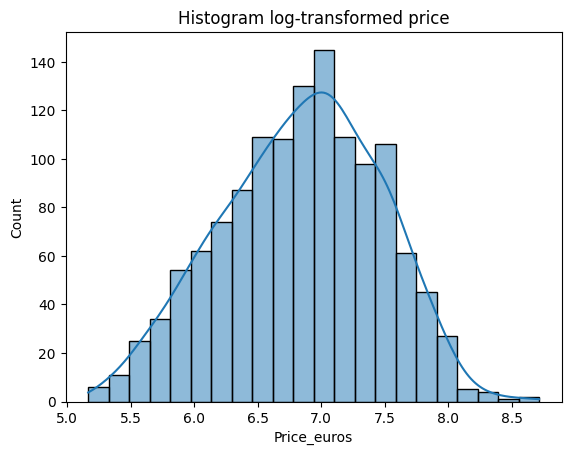

In [ ]:
# Histogram y_log
sns.histplot(y_log, kde=True)
plt.title('Histogram log-transformed price')
plt.show()

In [ ]:
#dddd

# Modele

## Model regresji liniowej

In [ ]:
labels_x = list(corr_df[abs(corr_df['Price_euros'])>0.1]['Price_euros'].index)
labels_x.remove('Price_euros')
labels_x

['Ram',
 'Weight',
 'Class_Resolution_Full HD',
 'Class_Resolution_HD',
 'Class_Resolution_QHD',
 'Memory_Size',
 'Memory_Size_added',
 'Memory_Type_num',
 'GPU_encoded',
 'OpSys_num',
 'CPU_encoded',
 'Cpu_GHZ',
 'Cpu_series_encoded',
 'Company_encoded',
 'TypeName_encoded']

In [ ]:
X1 = df[labels_x]
y1 = np.log1p(df['Price_euros'])

In [ ]:
#podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

In [ ]:
model=Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
#Współczynnik R2
r2_lin = r2_score(np.expm1(y_test),np.expm1(y_pred))
r2_lin

0.6489408346104046

In [ ]:
#Metryka MSE
mean_squared_error(np.expm1(y_test),np.expm1(y_pred))

178312.26186403027

In [ ]:
#współczynniki dla zmiennych
model.coef_

array([ 4.28582906e-02, -4.84864257e-02, -2.90347843e-01, -5.54652613e-01,
        1.66446523e-02,  6.53681708e-05,  1.20663044e-04,  1.20111517e-01,
        3.45835040e-02,  7.80620311e-02,  1.47488547e-01,  3.12770553e-01,
        4.88037154e-02,  4.32468287e-03,  2.36745314e-02])

In [ ]:
#współczynnik dla wyrazu wolnego
model.intercept_

4.7272722855922416

## Model regresji wielomianowej

In [ ]:
labels_x = list(corr_df[abs(corr_df['Price_euros'])>0.1]['Price_euros'].index)
labels_x.remove('Price_euros')
labels_x

['Ram',
 'Weight',
 'Class_Resolution_Full HD',
 'Class_Resolution_HD',
 'Class_Resolution_QHD',
 'Memory_Size',
 'Memory_Size_added',
 'Memory_Type_num',
 'GPU_encoded',
 'OpSys_num',
 'CPU_encoded',
 'Cpu_GHZ',
 'Cpu_series_encoded',
 'Company_encoded',
 'TypeName_encoded']

In [ ]:
X1 = df[labels_x]
y1 = np.log1p(df['Price_euros'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

In [ ]:
poly_features = PolynomialFeatures(degree=2)

In [ ]:
poly_features.fit(X_train)

PolynomialFeatures()

In [ ]:
X_train_poly = poly_features.transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [ ]:
modelpoly = Ridge(alpha=0.1)
modelpoly.fit(X_train_poly, y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred_poly = modelpoly.predict(X_test_poly)

In [ ]:
y_pred_polytrain = modelpoly.predict(X_train_poly)

In [ ]:
r2_poly = r2_score(np.expm1(y_test),np.expm1(y_pred_poly))
r2_poly

0.6393607476438546

In [ ]:
r2_polytrain = r2_score(np.expm1(y_train),np.expm1(y_pred_polytrain))
r2_polytrain

0.8265638294646044

In [ ]:
mse_poly = mean_squared_error(np.expm1(y_test),np.expm1(y_pred_poly))
mse_poly

183178.24214391806

In [ ]:
coefficients_poly = modelpoly.coef_
coefficients_poly

array([ 0.00000000e+00,  1.70929197e-01, -6.93849819e-01,  2.11890731e-01,
        2.28778682e-01, -3.97013060e-02, -3.74104298e-04,  9.35108195e-04,
        8.09370078e-01,  4.32769766e-02,  3.16195402e-01, -6.13470188e-01,
       -7.48643646e-01,  7.74087518e-02, -1.59962576e-02, -4.26645909e-01,
       -3.71464314e-04, -2.13430512e-03, -6.03092076e-04, -8.00685877e-03,
       -3.00801771e-02, -2.30915923e-05, -1.86657682e-05, -1.79482360e-03,
        7.85526506e-04,  9.19719033e-04, -8.35782837e-03, -7.67154726e-03,
       -5.84105861e-03, -4.79837455e-04, -9.66417461e-04,  1.96958879e-01,
       -1.88075334e-02, -7.44694994e-02,  2.37440444e-01,  1.90694391e-04,
       -1.62032862e-05,  5.67063236e-02, -3.08644465e-02, -3.87213002e-02,
       -3.40324013e-01,  9.69194665e-03,  1.22677319e-03,  8.78937257e-04,
        4.16736113e-02,  2.11890731e-01,  0.00000000e+00,  0.00000000e+00,
        1.98601086e-04, -4.29910964e-04, -4.89753291e-01, -3.34406166e-01,
        1.25249695e-01, -

In [ ]:
intercept_poly = modelpoly.intercept_
intercept_poly

5.704200550978975

## Model drzewa decyzyjnego

In [ ]:
labels_x = list(corr_df[abs(corr_df['Price_euros'])>0.1]['Price_euros'].index)
labels_x.remove('Price_euros')
labels_x

['Ram',
 'Weight',
 'Class_Resolution_Full HD',
 'Class_Resolution_HD',
 'Class_Resolution_QHD',
 'Memory_Size',
 'Memory_Size_added',
 'Memory_Type_num',
 'GPU_encoded',
 'OpSys_num',
 'CPU_encoded',
 'Cpu_GHZ',
 'Cpu_series_encoded',
 'Company_encoded',
 'TypeName_encoded']

In [ ]:
X1 = df[labels_x]
y1 = np.log1p(df['Price_euros'])

In [ ]:
param_grid = {
    'max_depth': [8, 9, 10, 11, 12],  # Maksymalna głębokość drzewa
    'min_samples_split': [5, 7, 9, 10, 12],   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [2, 4, 5, 6, 8]      # Minimalna liczba próbek wymagana w liściu węzła
}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.2,random_state=42)
modeltree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(modeltree, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik (negatywny MSE):", grid_search.best_score_)

Najlepsze parametry: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 12}
Najlepszy wynik (negatywny MSE): -0.0665044272015461


In [ ]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10, 11, 12],
                         'min_samples_leaf': [2, 4, 5, 6, 8],
                         'min_samples_split': [5, 7, 9, 10, 12]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik (negatywny MSE):", grid_search.best_score_)

Najlepsze parametry: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 12}
Najlepszy wynik (negatywny MSE): -0.0665044272015461


In [ ]:
best_params = grid_search.best_params_
best_params

{'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 12}

In [ ]:
best_model_tree = DecisionTreeRegressor(random_state=42, **best_params)

In [ ]:
best_model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=12,
                      random_state=42)

In [ ]:
best_model_tree.get_depth()

12

In [ ]:
best_model_tree.get_n_leaves()

132

In [ ]:
y_pred_train = best_model_tree.predict(X_train)
y_pred_test = best_model_tree.predict(X_test)

In [ ]:
r2_tree = r2_score(np.expm1(y_test),np.expm1(y_pred_test))

In [ ]:
print('r2 score dla testowych obserwacji: ', r2_score(np.expm1(y_test),np.expm1(y_pred_test)))
print('r2 score dla wytrenowanych obserwacji: ', r2_score(np.expm1(y_train),np.expm1(y_pred_train)))

r2 score dla testowych obserwacji:  0.648746380834941
r2 score dla wytrenowanych obserwacji:  0.8772355501896022


# Podsumowanie



Najlepszym modelem okazało się drzewo decyzyjne

In [ ]:
print('r2 score dla drzewa decyzyjnego: ', r2_tree)
print('r2 score dla regresji wielomianowej: ', r2_poly)
print('r2 score dla regresji liniowej: ', r2_lin)


r2 score dla drzewa decyzyjnego:  0.648746380834941
r2 score dla regresji wielomianowej:  0.6393607476438546
r2 score dla regresji liniowej:  0.6489408346104046
